# Verification of terminal digits test

Verification of the terminal digits test.
In this case the three colony counts are considered independent
extrations.
The hypotesis is that the last digit of each count can be modeled
as a draw from a uniform distribution.

DELETEME: (This version uses the same data import of the other tests - pandas...)

In [4]:
# import numpy and matlab plot library

import numpy as np

%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt


import scipy
import scipy.stats as stats

# import panda
import pandas as pd

In [29]:
#DELETEME - only one needed in the final notebook
## List of Functions

# This function takes an N by 3 matrix, sorts the matrix row wise, and then computes the ratio of (mid-min)/(max-min)
# for each row (excludes the rows with all equal entries.)
def compute_ratio(M):
    M.sort(axis=1)
    if (M.shape[1]!=3):
        print 'Size is flawed '
        print M.shape
        
    mid_min = M[:, 1] - M[:, 0]
    max_min = M[:, 2] - M[:, 0]
    ratio = ([mid_min[t]/max_min[t] for t in range(max_min.shape[0]) if max_min[t] !=0 ])
    return np.asarray(ratio)

# This function returns a list of last digits for an np array/ndarray input, and ignores the NAN values
def compute_last_digit(n_arr):
    n_arr = n_arr.flatten()
    return [int (n%10) for n in n_arr if not(np.isnan(n))]

# This function returns a list of last two digits for an np array/ndarray input 
# only for samples with more than 3 digits, 
# and ignores the NAN values.
# Saves it as a string
def compute_last_two_digits(n_arr):
    n_arr = n_arr.flatten()
    return ['%02d'%int(n%100) for n in n_arr if not(np.isnan(n)) and n > 99]

# This function takes a list of strings representing the last two digits and builds a simple 1-0 list 
# representing the equality of the last two digits:
# out[i] = 1 if n_list[i] has equal digits, 0 otherwise
def compute_last_two_digits_binary(n_list):
    return [1 if n[0]==n[1] else 0 for n in n_list]

# This function simply plots a histogram of the data (named ratio) with a given title and displays it inline.
def plot_np_hist(ratio, s='Title', show=False):
    plt.hist(ratio, bins=10, normed = False)
    plt.title(s)
    if show:
        plt.show()

# The next two functions are for obtaining histograms that look similar to the ones given in the paper. In these versions
# since we have to include the right hand edge, I do it manually - both the computation and the plotting of the bars.
def compute_my_histogram(ratio):
    v = np.zeros(10)
    N = len(ratio)
    v[0] = np.sum([( x <= 0.1) for x in ratio])
    for i in range(2, 11):
        thr = float(i) /10.
        v[i-1] = np.sum([( x <= thr and x > thr-0.1) for x in ratio])
    v /= np.sum(v)
    return v
def plot_my_histogram(v, s='Title', show=False):
    x = np.linspace(0,1,10,endpoint=False)
    plt.bar(x, v, width=0.1)
    plt.title(s)
    if show:
        plt.show()

In [6]:
# Load the datasets, with the investigator label for the data of the other labmates.

rts_colony_df = pd.read_excel("data/Bishayee Colony Counts 10.27.97-3.8.01.xlsx", 
                              na_values = [' '], skiprows=[0,1], parse_cols = ("D:F"), header = 0)   

rest_colony_df = pd.read_excel("data/Other Investigators in Lab.Colony Counts.4.23.92-11.27.02.xlsx", 
                               na_values = [' '], header = 0, skiprows = [0], parse_cols = ("C:F"))

out3_colony_df = pd.read_excel("data/Outside Lab 3.Colony Counts.2.4.10-5.21.12.xlsx", 
                                na_values = [' '], header = 0, skiprows = [0], parse_cols = ("B:D"))

rts_coulter_df = pd.read_excel("data/Bishayee Coulter Counts.10.20.97-7.16.01.xlsx", 
                               na_values = [' '], skiprows=[0], parse_cols = ("C:E"), header = 0)   

rest_coulter_df = pd.read_excel("data/Other Investigators in Lab.Coulter Counts.4.15.92-5.21.05.xlsx", 
                                na_values = [' '], header = 0, skiprows = [0], parse_cols = ("C:E,G"))

out1_coulter_df = pd.read_excel("data/Outside Lab 1.Coulter Counts.6.7.91-4.9.99.xlsx", 
                                na_values = [' '], header = None, skiprows = [0], parse_cols = ("B:D"))

out2_coulter_df = pd.read_excel("data/Outside Lab 2.Coulter Counts.6.6.08-7.7.08.xlsx", 
                                na_values = [' '], header = 0, skiprows = [0], parse_cols = ("B:D"))



In [7]:
print rts_colony_df.values[0:3,:]
print rest_colony_df.values[0:3,:]
print out3_colony_df.values[0:3,:]
print rts_coulter_df.values[0:3,:]
print rest_coulter_df.values[0:3,:]
print out1_coulter_df.values[0:3,:]
print out2_coulter_df.values[0:3,:]

#pool_coulter = np.vstack([rts_coulter_df.values, rest_coulter_df.values[:,0:3], out1_coulter_df, out2_coulter_df])
#pool_colony = np.vstack([rts_colony_df.values, rest_colony_df.values[:,1:4], out3_colony_df])
#pool_all = np.vstack([pool_coulter, pool_colony])

#print pool_coulter[0:3,:]
#print pool_colony[0:3,:]
#print pool_all[0:3,:]

[[ 78.  91.  93.]
 [ 90.  88.  90.]
 [ 80.  66.  69.]]
[[u'I' 266 247.0 262.0]
 [u'I' 170 151.0 156.0]
 [u'I' 66 66.0 56.0]]
[[54 55 59]
 [47 60 47]
 [55 60 53]]
[[ 531.  508.  541.]
 [ 650.  626.  595.]
 [ 460.  455.  468.]]
[[1547.0 1574.0 1523.0 u'I']
 [1617.0 1552.0 1570.0 u'I']
 [1258.0 1279.0 1284.0 u'I']]
[[ 2266.  2321.  2192.]
 [  676.   554.   478.]
 [  601.   723.   520.]]
[[5868 5838 5691]
 [3451 3343 3315]
 [4844 4854 4695]]


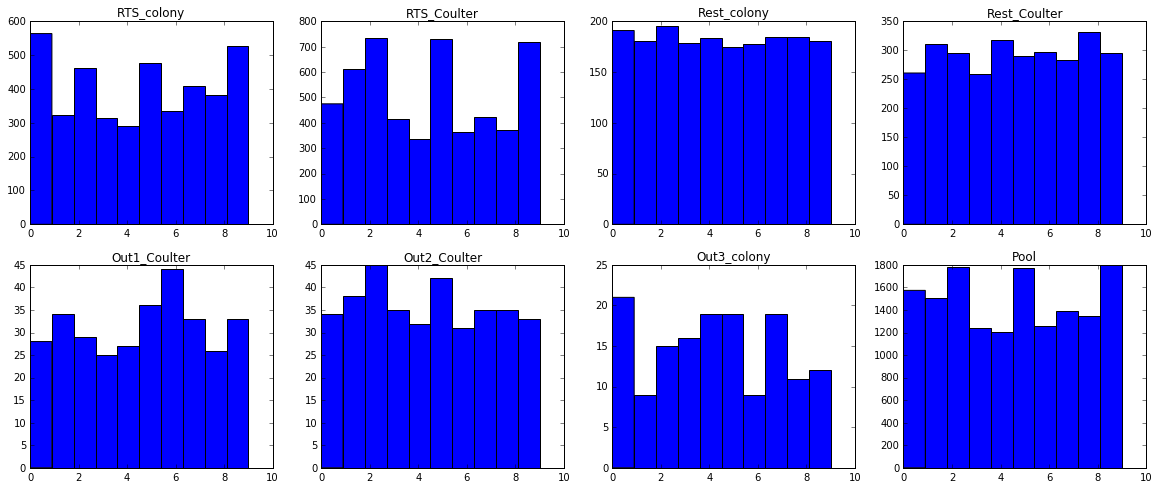

In [8]:
# In this section we plot the distribution of last digit for RTS, Rest and All of them pooled together for the Coulter
# Data. We ignore the NAN values

# Compute the last digit distribution
rld = compute_last_digit(rts_coulter_df.values)
rc_ld = compute_last_digit(rts_colony_df.values)
rest_ld = compute_last_digit(rest_coulter_df.values[:,0:3])
restc_ld = compute_last_digit(rest_colony_df.values[:,1:4])
out1_ld = compute_last_digit(out1_coulter_df.values)
out2_ld = compute_last_digit(out2_coulter_df.values)
out3_ld = compute_last_digit(out3_colony_df.values)
pool_ld = np.concatenate([rld, rc_ld, rest_ld, restc_ld, out1_ld, out2_ld, out3_ld])

# Now Plot
plt.figure(figsize=[20,8])
plt.subplot(241)
plot_np_hist(rc_ld, 'RTS_colony')
plt.subplot(242)
plot_np_hist(rld, 'RTS_Coulter')
plt.subplot(243)
plot_np_hist(restc_ld, 'Rest_colony')
plt.subplot(244)
plot_np_hist(rest_ld, 'Rest_Coulter')
plt.subplot(245)
plot_np_hist(out1_ld, 'Out1_Coulter')
plt.subplot(246)
plot_np_hist(out2_ld, 'Out2_Coulter')
plt.subplot(247)
plot_np_hist(out3_ld, 'Out3_colony')
plt.subplot(248)
plot_np_hist(pool_ld, 'Pool')

plt.show()

In [9]:
#ChiSquare test to match frequencies wrt terminal digits.
#DELETEME Is this OK using scipy.stats.chisquare or is it better to do it manually (see python files)?
#altenatively build
#chi_val = 0
#for f in freq:
#    chi_val = chi_val + ( (f - exp_freq) ** 2) / exp_freq
#p_val = sp.stats.chisqprob(chi_val, DF)

#build convenience dictionaries
names = ['RTS_Coulter', 'RTS_Colony', 'Rest_Coulter', 'Rest_Colony', 'Out1_Coulter', 'Out2_Coulter', 'Out3_Colony']


#Expected frequencies
rts_coulter_exp_freq = np.array([len(rld)/10 for _ in range(10)])
rts_colony_exp_freq = np.array([len(rc_ld)/10 for _ in range(10)])
rest_coulter_exp_freq = np.array([len(rest_ld)/10 for _ in range(10)])
rest_colony_exp_freq = np.array([len(restc_ld)/10 for _ in range(10)])
out1_coulter_exp_freq = np.array([len(out1_ld)/10 for _ in range(10)])
out2_coulter_exp_freq = np.array([len(out2_ld)/10 for _ in range(10)])
out3_colony_exp_freq = np.array([len(out3_ld)/10 for _ in range(10)])

#build frequencies for each group
rts_coulter_hist = np.histogram(rld, range(10 + 1))
rts_colony_hist = np.histogram(rc_ld, range(10 + 1))
rest_coulter_hist = np.histogram(rest_ld, range(10 + 1))
rest_colony_hist = np.histogram(restc_ld, range(10 + 1))
out1_coulter_hist = np.histogram(out1_ld, range(10 + 1))
out2_coulter_hist = np.histogram(out2_ld, range(10 + 1))
out3_colony_hist = np.histogram(out3_ld, range(10 + 1))


rts_coulter_chi2 = stats.chisquare(rts_coulter_hist[0], rts_coulter_exp_freq)
rts_colony_chi2 = stats.chisquare(rts_colony_hist[0], rts_colony_exp_freq)
rest_coulter_chi2 = stats.chisquare(rest_coulter_hist[0], rest_coulter_exp_freq)
rest_colony_chi2 = stats.chisquare(rest_colony_hist[0], rest_colony_exp_freq)
out1_coulter_chi2 = stats.chisquare(out1_coulter_hist[0], out1_coulter_exp_freq)
out2_coulter_chi2 = stats.chisquare(out2_coulter_hist[0], out2_coulter_exp_freq)
out3_colony_chi2 = stats.chisquare(out3_colony_hist[0], out3_colony_exp_freq)

#table 3 results
print 'Name \t\t 0 \t 1 \t 2 \t 3 \t 4 \t 5 \t 6 \t 7 \t 8 \t 9 \t total \t chi-square \t P \t'
print 'RTS_Coulter \t %s \t %d \t %f \t %f' % (' \t '.join(map(str, rts_coulter_hist[0])), sum(rts_coulter_hist[0]), rts_coulter_chi2[0], rts_coulter_chi2[1])
print 'RTS_Colony \t %s \t %d \t %f \t %f' % (' \t '.join(map(str, rts_colony_hist[0])), sum(rts_colony_hist[0]), rts_colony_chi2[0], rts_colony_chi2[1])
print 'Rest_Coulter \t %s \t %d \t %f \t %f' % (' \t '.join(map(str, rest_coulter_hist[0])), sum(rest_coulter_hist[0]), rest_coulter_chi2[0], rest_coulter_chi2[1])
print 'Rest_Colony \t %s \t %d \t %f \t %f' % (' \t '.join(map(str, rest_colony_hist[0])), sum(rest_colony_hist[0]), rest_colony_chi2[0], rest_colony_chi2[1])
print 'Out1_Coulter \t %s \t %d \t %f \t %f' % (' \t '.join(map(str, out1_coulter_hist[0])), sum(out1_coulter_hist[0]), out1_coulter_chi2[0], out1_coulter_chi2[1])
print 'Out2_Coulter \t %s \t %d \t %f \t %f' % (' \t '.join(map(str, out2_coulter_hist[0])), sum(out2_coulter_hist[0]), out2_coulter_chi2[0], out2_coulter_chi2[1])
print 'Out3_Colony \t %s \t %d \t %f \t %f' % (' \t '.join(map(str, out3_colony_hist[0])), sum(out3_colony_hist[0]), out3_colony_chi2[0], out3_colony_chi2[1])



Name 		 0 	 1 	 2 	 3 	 4 	 5 	 6 	 7 	 8 	 9 	 total 	 chi-square 	 P 	
RTS_Coulter 	 475 	 613 	 736 	 416 	 335 	 732 	 363 	 425 	 372 	 718 	 5185 	 467.330116 	 0.000000
RTS_Colony 	 564 	 324 	 463 	 313 	 290 	 478 	 336 	 408 	 383 	 526 	 4085 	 200.977941 	 0.000000
Rest_Coulter 	 261 	 311 	 295 	 259 	 318 	 290 	 298 	 283 	 331 	 296 	 2942 	 16.006803 	 0.066740
Rest_Colony 	 191 	 181 	 195 	 179 	 184 	 175 	 178 	 185 	 185 	 181 	 1834 	 1.803279 	 0.994210
Out1_Coulter 	 28 	 34 	 29 	 25 	 27 	 36 	 44 	 33 	 26 	 33 	 315 	 9.709677 	 0.374496
Out2_Coulter 	 34 	 38 	 45 	 35 	 32 	 42 	 31 	 35 	 35 	 33 	 360 	 4.944444 	 0.839124
Out3_Colony 	 21 	 9 	 15 	 16 	 19 	 19 	 9 	 19 	 11 	 12 	 150 	 12.133333 	 0.205897


### Comment
Rest_Colony seems having a suspiciously high P-value.
The next section will decompose that value wrt single individuals taking samples

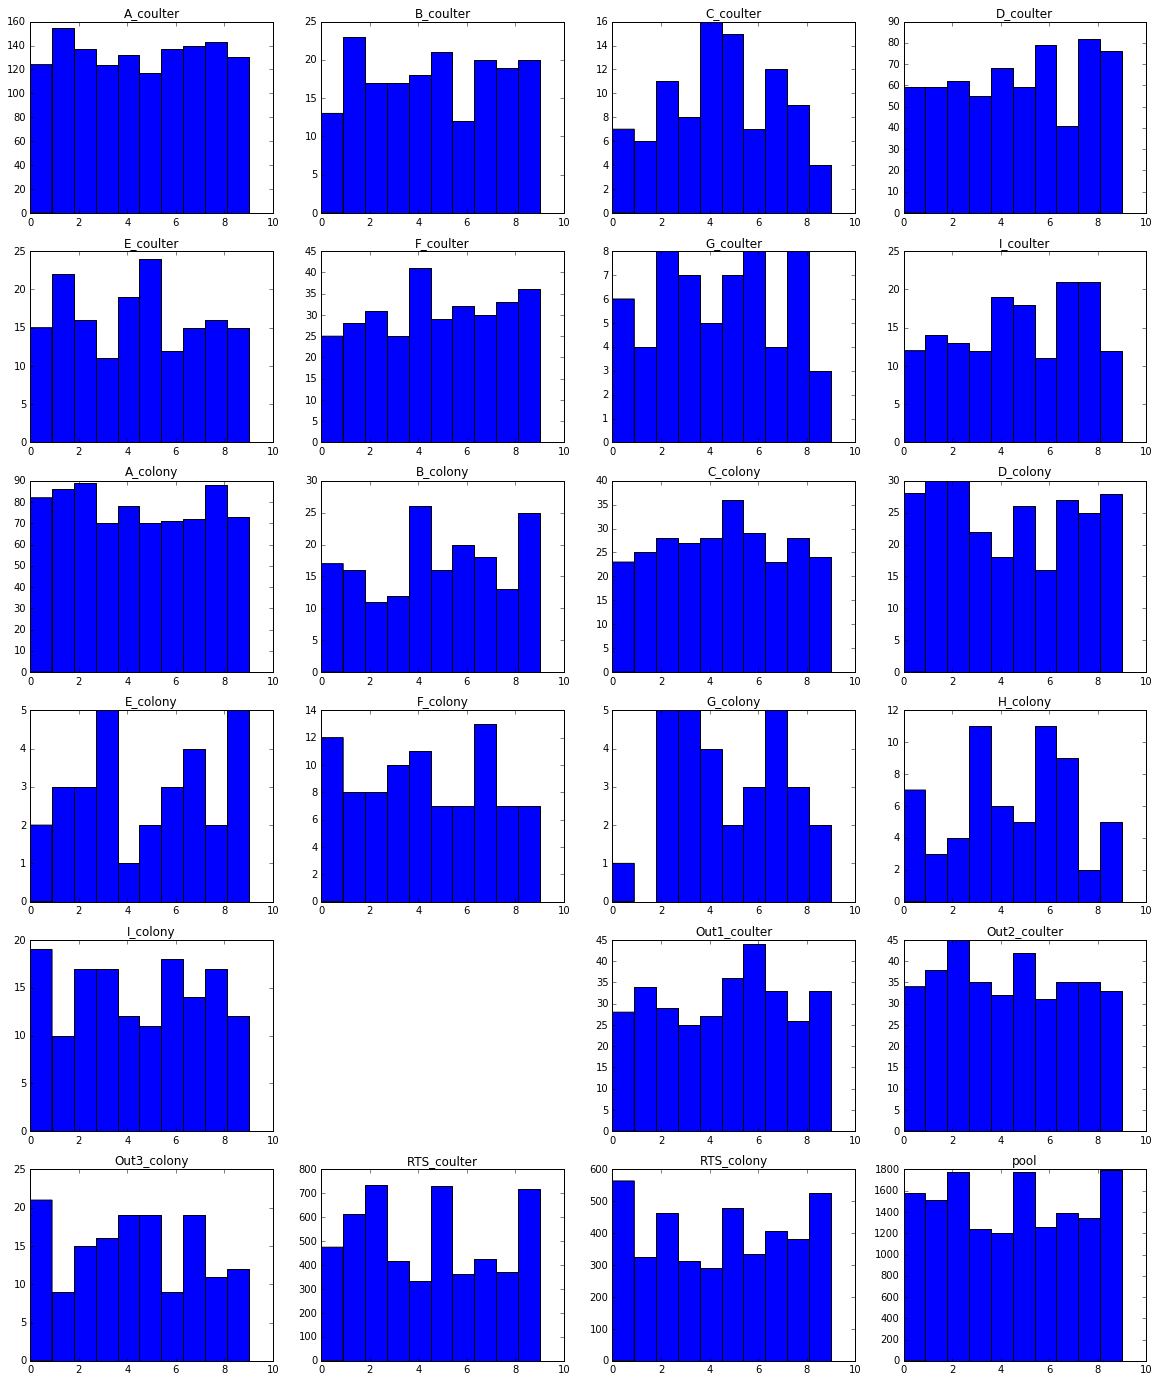

In [10]:
# Terminal digit plots decomposing labmates, 0 to 9, plus outside labs
def cld_val(df):
    return compute_last_digit(df.values[:,0:3])

def cldc_val(df):
    return compute_last_digit(df.values[:,1:4])

rest_grouped_ld = rest_coulter_df.groupby("Investigator").apply(cld_val)

restc_grouped_ld = rest_colony_df.groupby("Inv").apply(cldc_val)

plt.figure(figsize = [20,24])
for j in range(rest_grouped_ld.shape[0]):
    plt.subplot(6,4,j+1)
    plot_np_hist(rest_grouped_ld[j], '%s_coulter' % rest_grouped_ld.index[j])
    
for t in range(restc_grouped_ld.shape[0]):
    plt.subplot(6,4,t+j+2)
    plot_np_hist(restc_grouped_ld[t], '%s_colony' % restc_grouped_ld.index[t])
    

plt.subplot(6,4,19)
plot_np_hist(out1_ld, 'Out1_coulter')
plt.subplot(6,4,20)
plot_np_hist(out2_ld, 'Out2_coulter')
plt.subplot(6,4,21)
plot_np_hist(out3_ld, 'Out3_colony')
plt.subplot(6,4,22)
plot_np_hist(rld, 'RTS_coulter')
plt.subplot(6,4,23)
plot_np_hist(rc_ld, 'RTS_colony')
plt.subplot(6,4,24)
plot_np_hist(pool_ld, 'pool')
plt.show()

In [11]:
#ChiSquare test to match frequencies wrt terminal digits for individual lab partners

#Expected frequencies
ind_coulter_exp_freq = {}
ind_coulter_hist = {}
ind_coulter_chi2 = {}

ind_colony_exp_freq = {}
ind_colony_hist = {}
ind_colony_chi2 = {}

for j in range(rest_grouped_ld.shape[0]):
    ind_coulter_exp_freq[rest_grouped_ld.index[j]] = np.array([len(rest_grouped_ld[j])/10 for _ in range(10)])
    ind_coulter_hist[rest_grouped_ld.index[j]] = np.histogram(rest_grouped_ld[j], range(10 + 1))
    ind_coulter_chi2[rest_grouped_ld.index[j]] = stats.chisquare(ind_coulter_hist[rest_grouped_ld.index[j]][0], ind_coulter_exp_freq[rest_grouped_ld.index[j]])
    
for j in range(restc_grouped_ld.shape[0]):
    ind_colony_exp_freq[restc_grouped_ld.index[j]] = np.array([len(restc_grouped_ld[j])/10 for _ in range(10)])
    ind_colony_hist[restc_grouped_ld.index[j]] = np.histogram(restc_grouped_ld[j], range(10 + 1))
    ind_colony_chi2[restc_grouped_ld.index[j]] = stats.chisquare(ind_colony_hist[restc_grouped_ld.index[j]][0], ind_colony_exp_freq[restc_grouped_ld.index[j]])
    

#table 3 results
print 'Name \t\t 0 \t 1 \t 2 \t 3 \t 4 \t 5 \t 6 \t 7 \t 8 \t 9 \t total \t chi-square \t P \t'

for j in range(rest_grouped_ld.shape[0]):
    print '%s_Coulter \t %s \t %d \t %f \t %f' % (rest_grouped_ld.index[j],
                                                  ' \t '.join(map(str, ind_coulter_hist[rest_grouped_ld.index[j]][0])), 
                                                  sum(ind_coulter_hist[rest_grouped_ld.index[j]][0]), 
                                                  ind_coulter_chi2[rest_grouped_ld.index[j]][0], 
                                                  ind_coulter_chi2[rest_grouped_ld.index[j]][1])
for j in range(restc_grouped_ld.shape[0]):
    print '%s_Colony \t %s \t %d \t %f \t %f' % (restc_grouped_ld.index[j],
                                                  ' \t '.join(map(str, ind_colony_hist[restc_grouped_ld.index[j]][0])), 
                                                  sum(ind_colony_hist[restc_grouped_ld.index[j]][0]), 
                                                  ind_colony_chi2[restc_grouped_ld.index[j]][0], 
                                                  ind_colony_chi2[restc_grouped_ld.index[j]][1])

Name 		 0 	 1 	 2 	 3 	 4 	 5 	 6 	 7 	 8 	 9 	 total 	 chi-square 	 P 	
A_Coulter 	 124 	 155 	 137 	 124 	 132 	 117 	 137 	 140 	 143 	 130 	 1339 	 8.218045 	 0.512331
B_Coulter 	 13 	 23 	 17 	 17 	 18 	 21 	 12 	 20 	 19 	 20 	 180 	 5.888889 	 0.750985
C_Coulter 	 7 	 6 	 11 	 8 	 16 	 15 	 7 	 12 	 9 	 4 	 95 	 15.666667 	 0.074177
D_Coulter 	 59 	 59 	 62 	 55 	 68 	 59 	 79 	 41 	 82 	 76 	 640 	 21.843750 	 0.009388
E_Coulter 	 15 	 22 	 16 	 11 	 19 	 24 	 12 	 15 	 16 	 15 	 165 	 9.562500 	 0.387049
F_Coulter 	 25 	 28 	 31 	 25 	 41 	 29 	 32 	 30 	 33 	 36 	 310 	 6.967742 	 0.640478
G_Coulter 	 6 	 4 	 8 	 7 	 5 	 7 	 8 	 4 	 8 	 3 	 60 	 5.333333 	 0.804337
I_Coulter 	 12 	 14 	 13 	 12 	 19 	 18 	 11 	 21 	 21 	 12 	 153 	 9.666667 	 0.378138
A_Colony 	 82 	 86 	 89 	 70 	 78 	 70 	 71 	 72 	 88 	 73 	 779 	 7.103896 	 0.626303
B_Colony 	 17 	 16 	 11 	 12 	 26 	 16 	 20 	 18 	 13 	 25 	 174 	 13.764706 	 0.130945
C_Colony 	 23 	 25 	 28 	 27 	 28 	 36 	 29 	 23 	 28

### Comment
Decomposing data for other investigators shows that the single p-values are less suspiciuos than the p-value of the aggregate data.

# Equal digits test

In this case the three colony counts are considered independent
extrations.
The hypotesis is that the last pair of digits being equal
(for experiments with at least three digits)
behaves as a draw from a uniform distribution, that is, 10% chance

In [30]:
rts_coulter_td_s = compute_last_two_digits(rts_coulter_df.values)
rts_colony_td_s = compute_last_two_digits(rts_colony_df.values)
rest_coulter_td_s = compute_last_two_digits(rest_coulter_df.values[:,0:3])
rest_colony_td_s = compute_last_two_digits(rest_colony_df.values[:,1:4])
out1_coulter_td_s = compute_last_two_digits(out1_coulter_df.values)
out2_coulter_td_s = compute_last_two_digits(out2_coulter_df.values)
out3_colony_td_s = compute_last_two_digits(out3_colony_df.values)

#print to check format
print rts_coulter_td_s[0:10]

rts_coulter_td = compute_last_two_digits_binary(rts_coulter_td_s)
rts_colony_td = compute_last_two_digits_binary(rts_colony_td_s)
rest_coulter_td = compute_last_two_digits_binary(rest_coulter_td_s)
rest_colony_td = compute_last_two_digits_binary(rest_colony_td_s)
out1_coulter_td = compute_last_two_digits_binary(out1_coulter_td_s)
out2_coulter_td = compute_last_two_digits_binary(out2_coulter_td_s)
out3_colony_td = compute_last_two_digits_binary(out3_colony_td_s)


#print to check format
print rts_coulter_td[0:10]

['31', '08', '41', '50', '26', '95', '60', '55', '68', '50']
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]


In [ ]:
#build freq expectations and histograms
#we have only two sets, the terminal digits are the same, or not

rts_coulter_td_exp_freq = [len(rts_coulter_td)*0.9 len(rts_coulter_td)*0.1]
rts_colony_td_exp_freq = [len(rts_coulter_td)*0.9 len(rts_coulter_td)*0.1]
rest_coulter_td_exp_freq = np.hystogram(rest_coulter_td, range(2 + 1))
rest_colony_td_exp_freq = np.hystogram(rest_colony_td, range(2 + 1))
out1_coulter_td_exp_freq = np.hystogram(out1_coulter_td, range(2 + 1))
out2_coulter_td_exp_freq = np.hystogram(out2_coulter_td, range(2 + 1))
out3_colony_td_exp_freq = np.hystogram(out3_colony_td, range(2 + 1))

rts_coulter_td_hist = np.hystogram(rts_coulter_td, range(2 + 1))
rts_colony_td_hist = np.hystogram(rts_colony_td, range(2 + 1))
rest_coulter_td_hist = np.hystogram(rest_coulter_td, range(2 + 1))
rest_colony_td_hist = np.hystogram(rest_colony_td, range(2 + 1))
out1_coulter_td_hist = np.hystogram(out1_coulter_td, range(2 + 1))
out2_coulter_td_hist = np.hystogram(out2_coulter_td, range(2 + 1))
out3_colony_td_hist = np.hystogram(out3_colony_td, range(2 + 1))